### Polynomial Regression

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [71]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

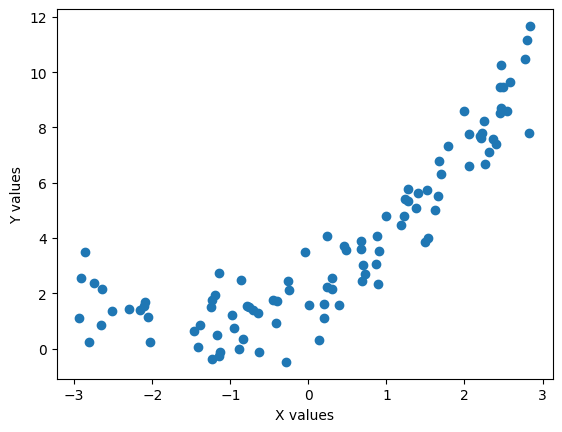

In [72]:
plt.scatter(X,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

##### Linear regeression model without polynomial transformation

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25, random_state=42) 

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Y')

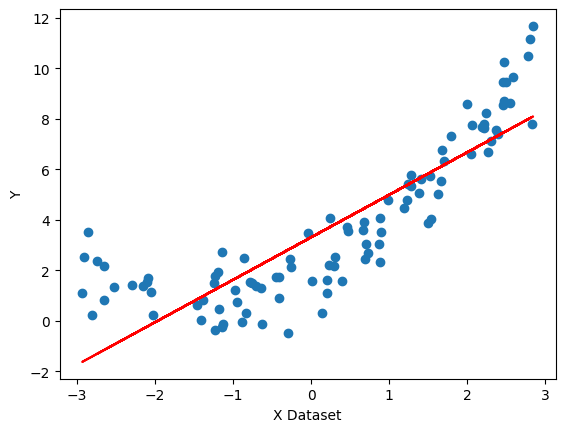

In [75]:
plt.scatter(X,y)
plt.plot(X_train,regressor.predict(X_train), color = 'red')
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [76]:
pred = regressor.predict(X_test)
pred

array([[ 7.03574454],
       [ 1.39252749],
       [ 5.88969803],
       [ 2.62392733],
       [ 7.08197337],
       [ 1.21887885],
       [-1.15810331],
       [ 6.65748218],
       [ 6.99541436],
       [ 2.88350352],
       [ 0.97517503],
       [ 4.4740397 ],
       [-1.50721441],
       [ 2.61954042],
       [ 5.45168613],
       [-0.54718807],
       [ 6.76112534],
       [ 0.85143477],
       [-1.5794939 ],
       [ 0.9408484 ],
       [ 2.82066845],
       [ 3.81076631],
       [ 1.38618259],
       [ 6.10758898],
       [ 6.31226869]])

In [77]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, pred)
score

0.56524348456138

##### Applying polynomial transformation


In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.00000000e+00,  1.23856558e+00,  1.53404471e+00],
       [ 1.00000000e+00, -2.80555697e+00,  7.87114991e+00],
       [ 1.00000000e+00, -2.93251122e+00,  8.59962203e+00],
       [ 1.00000000e+00, -2.10365432e+00,  4.42536149e+00],
       [ 1.00000000e+00, -6.34730173e-01,  4.02882393e-01],
       [ 1.00000000e+00, -9.46157201e-01,  8.95213449e-01],
       [ 1.00000000e+00, -2.64903045e+00,  7.01736230e+00],
       [ 1.00000000e+00,  1.70204939e+00,  2.89697212e+00],
       [ 1.00000000e+00, -2.74163975e+00,  7.51658854e+00],
       [ 1.00000000e+00,  2.47260888e+00,  6.11379469e+00],
       [ 1.00000000e+00, -2.02811152e+00,  4.11323633e+00],
       [ 1.00000000e+00, -1.23098704e+00,  1.51532909e+00],
       [ 1.00000000e+00, -2.05025915e+00,  4.20356257e+00],
       [ 1.00000000e+00,  1.22600819e+00,  1.50309608e+00],
       [ 1.00000000e+00,  1.18958445e+00,  1.41511117e+00],
       [ 1.00000000e+00, -2.51873226e+00,  6.34401218e+00],
       [ 1.00000000e+00,  1.49374815e+00

In [79]:
X_test_poly = poly.transform(X_test)
X_test_poly

array([[ 1.        ,  2.21719223,  4.91594139],
       [ 1.        , -1.1396495 ,  1.29880099],
       [ 1.        ,  1.53547173,  2.35767344],
       [ 1.        , -0.40715696,  0.16577679],
       [ 1.        ,  2.24469124,  5.03863876],
       [ 1.        , -1.2429436 ,  1.54490879],
       [ 1.        , -2.65688051,  7.05901406],
       [ 1.        ,  1.9921846 ,  3.96879949],
       [ 1.        ,  2.19320201,  4.81013506],
       [ 1.        , -0.25274926,  0.06388219],
       [ 1.        , -1.3879097 ,  1.92629332],
       [ 1.        ,  0.69337388,  0.48076733],
       [ 1.        , -2.86454765,  8.20563321],
       [ 1.        , -0.4097665 ,  0.16790858],
       [ 1.        ,  1.27492236,  1.62542704],
       [ 1.        , -2.29348039,  5.26005231],
       [ 1.        ,  2.05383626,  4.21824339],
       [ 1.        , -1.46151602,  2.13602908],
       [ 1.        , -2.90754277,  8.45380494],
       [ 1.        , -1.40832873,  1.98338982],
       [ 1.        , -0.29012641,  0.084

In [80]:
model = LinearRegression()
model.fit(X_train_poly, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


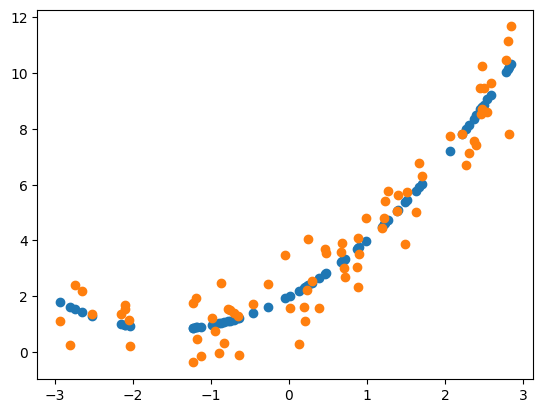

In [82]:
plt.scatter(X_train,model.predict(X_train_poly))
plt.scatter(X_train,Y_train)

In [83]:
score = r2_score(Y_test, model.predict(X_test_poly))
score

0.8883189354244685

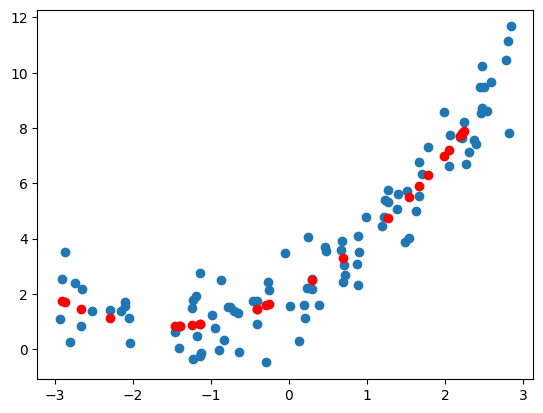

In [85]:
plt.scatter(X,y)
plt.scatter(X_test, model.predict(X_test_poly),color = "red")

##### Pipelines

In [86]:
from sklearn.pipeline import Pipeline
def show_polyreg(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_manipulators = PolynomialFeatures(degree=degree, include_bias=True)
    regression = LinearRegression()
    pipeline_reg = Pipeline([
        ("polynomial_shifter",poly_manipulators),
        ("linear_regression",regression)
    ])
    pipeline_reg.fit(X_train, Y_train)
    predict = pipeline_reg.predict(X_new)
    plt.plot(X_new, predict,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, Y_train, "b.", linewidth=3)
    plt.plot(X_test, Y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

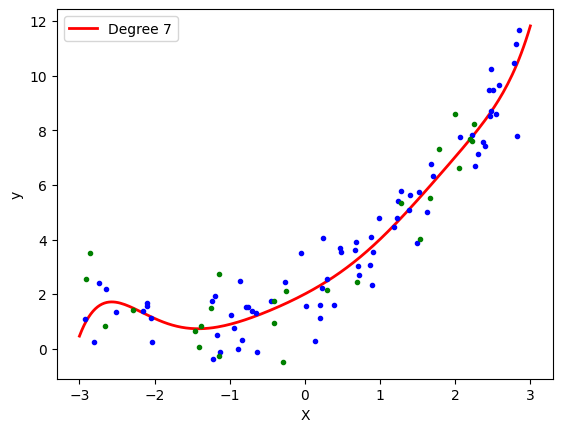

In [90]:
show_polyreg(7)